Setiap bahasa pemrograman menyediakan library dukungan terhadap kriptografi, termasuk bahasa pemrograman Python. Dengan Library, memudahkan kita untuk mengimplementasikan algoritma-algoritma kriptografi tanpa harus membuatnya dari awal.

Jalankan kode-kode berikut satu-persatu kemudian kerjakan latihan yang diberikan.

# **Install library-library yang dibutuhkan**

Beberapa library yang dibutuhkan antara lain cryptography, pycryptodome dan pycryptodomex

1. Install library cryptography

In [ ]:
!pip install cryptography

2. Install library pycryptodomex

In [ ]:
!pip install pycryptodomex

3. Install library pycryptodome

In [ ]:
!pip install pycryptodome

4. Contoh hash plainteks menggunakan algoritma SHA256 dan MD5

In [ ]:
# import library SHA256
from Crypto.Hash import SHA256
from Crypto.Hash import MD5

# Hash string "abc" menggunakan algoritma SHA256
str = b'ini adalah pesan asli' 
print("Plainteks : ", str.decode())
d1 = SHA256.new()
d1.update(str)
print("SHA256 Hash : ", d1.hexdigest())

# Hash string "abc" menggunakan algoritma MD5
d2 = MD5.new()
d2.update(str)
print("MD5 Hash : ", d2.hexdigest())



5. Cara hash dapat lebih disederhanakan lagi

In [ ]:
hash_object = SHA256.new(data=str)
print(hash_object.hexdigest())

6. Berikut ini prinsip kerja hash pada library pycryptodome
<br><img src="https://pycryptodome.readthedocs.io/en/latest/_images/hashing.png" width="400">

7. Method update() dapat dipanggil beberapa kali sesuai kebutuhan, dengan potongan teks lainnya

In [ ]:
hash_object = SHA256.new()
hash_object.update(b'Satu')
hash_object.update(b'Dua')
print(hash_object.hexdigest())

> Potongan kode diatas menghasilkan hash yang sama dengan kode dibawah





In [ ]:
hash_object = SHA256.new()
hash_object.update(b'SatuDua')
print(hash_object.hexdigest())

> Dokumentasi lengkap PyCryptodome dapat dibaca pada tautan [https://pycryptodome.readthedocs.io/en/latest/](https://pycryptodome.readthedocs.io/en/latest/)



# **Enkripsi dengan algoritma AES**

AES adalah salah satu algoritma kriptografi modern yang dan merupakan standar enkripsi dengan kunci-simetris

1. Membangkitkan kunci 32 byte / 256 bit

In [ ]:
from Crypto.Random import get_random_bytes

key_location = "my_key.bin"
# membangkitkan kunci
key = get_random_bytes(32)

2. Menyimpan kunci pada file

In [ ]:
file_out = open(key_location, "wb") # wb = write bytes
file_out.write(key)
file_out.close()

3. Enkripsi

In [ ]:
from Crypto.Util.Padding import pad

# Membaca file kunci
file_in = open(key_location, "rb") # rb = Read bytes
key_from_file = file_in.read()
file_in.close()

output_file = 'encrypted.bin' # file output / cipherteks
data_to_encrypt = 'Politeknik Siber dan Sandi Negara' # Must be a bytes object
data = data_to_encrypt.encode()
# membuat cipher object dengan mode CBC
cipher = AES.new(key_from_file, AES.MODE_CBC)

# lakukan pad pada input data kemudian enkrip
ciphered_data = cipher.encrypt(pad(data, AES.block_size))

# membuat file output
file_out = open(output_file, "wb") 
file_out.write(cipher.iv)
file_out.write(ciphered_data)
file_out.close()

File output tersimpan di jendela "File". 
Buka jendela "File" di navigasi sebelah kiri (klik refresh pada navigasi apabila tidak muncul)

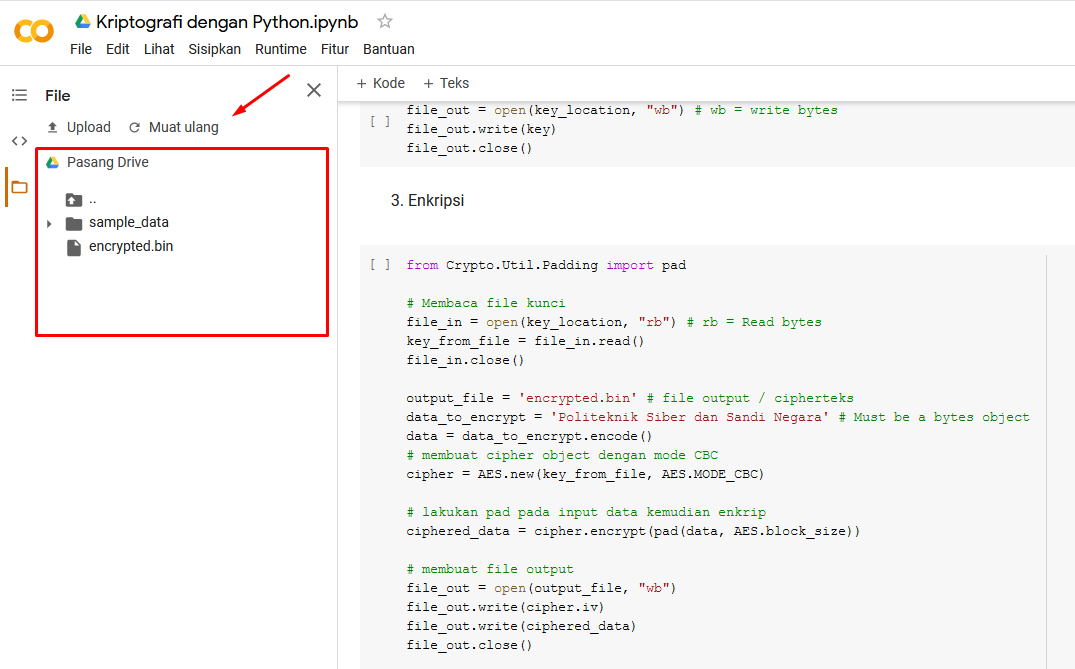

4. Dekripsi

In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad

# Membaca file kunci
file_in = open(key_location, "rb") # rb = Read bytes
key_from_file = file_in.read()
file_in.close()

input_file = 'encrypted.bin' # Input file

# baca data input_file
file_in = open(input_file, 'rb')
iv = file_in.read(16)
ciphered_data = file_in.read()
file_in.close()

# setup cipher dengan mode CBC
cipher = AES.new(key_from_file, AES.MODE_CBC, iv=iv)

# dekrip cipher kemudian unpad
original_data = unpad(cipher.decrypt(ciphered_data), AES.block_size)
print(original_data.decode())

**Soal latihan 1**

1. Gunakan mode lain (CFB atau EAX) untuk enkripsi teks dengan algoritma AES

In [ ]:
# tulis kode jawaban nomor 1 disini

2. Gunakan mode lain (CFB atau EAX) untuk dekripsi cipherteks dengan algoritma AES

In [ ]:
# tulis kode jawaban nomor 2 disini

# **Enkripsi dengan Algoritma RSA**

Algoritma RSA merupakan salah satu algoritma kriptografi kunci publik yang populer dipakai dan bahkan masih dipakai hingga saat ini. Proses dimulai dengan membangkitkan pasangan kunci.

1. Membangkitkan pasangan kunci publik dan kunci privat dengan algoritma RSA

In [ ]:
from Crypto.PublicKey import RSA

# kunci privat dibangkitkan random
key = RSA.generate(2048)
private_key = key.export_key()
file_out = open("private.pem", "wb")
file_out.write(private_key)
file_out.close()

# kunci publik
public_key = key.publickey().export_key()
file_out = open("public.pem", "wb")
file_out.write(public_key)
file_out.close()

2. Enkripsi

In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES, PKCS1_OAEP

data = "Kemarin saya ketemu alien, ternyata dia bisa bicara bahasa Indonesia!".encode()
file_out = open("encrypted_data2.bin", "wb")

recipient_key = RSA.import_key(open("public.pem").read())
session_key = get_random_bytes(16)

# enkripsi session key menggunakan kunci publik RSA
cipher_rsa = PKCS1_OAEP.new(recipient_key)
cipher_data = cipher_rsa.encrypt(data)

file_out.write(cipher_data)
file_out.close()

3. Dekripsi

In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP

file_in = open("encrypted_data2.bin", "rb")

private_key = RSA.import_key(open("private.pem").read())

# dekripsi session_key menggunakan kunci privat RSA
cipher_rsa = PKCS1_OAEP.new(private_key)
plain_data = cipher_rsa.decrypt(file_in.read())

# dekripsi cipherteks (AES) menggunakan session key yang telah didekripsi
print(plain_data.decode())

# **Algoritma Hybrid (RSA x AES)**

Contoh berikut adalah penggunaan algoritma RSA yang digabungkan dengan algoritma AES. Algoritma RSA digunakan untuk enkripsi kunci AES.

1. Gunakan kunci sebelumnya untuk enkripsi teks

In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES, PKCS1_OAEP

data = "Kemarin saya ketemu alien, ternyata dia bisa bicara bahasa Indonesia!".encode()
file_out = open("encrypted_data.bin", "wb")

recipient_key = RSA.import_key(open("public.pem").read())
session_key = get_random_bytes(16)

# enkripsi session key menggunakan kunci publik RSA
cipher_rsa = PKCS1_OAEP.new(recipient_key)
enc_session_key = cipher_rsa.encrypt(session_key)

# enkripsi data dengan AES mode EAX
cipher_aes = AES.new(session_key, AES.MODE_EAX)
ciphertext, tag = cipher_aes.encrypt_and_digest(data)
[ file_out.write(x) for x in (enc_session_key, cipher_aes.nonce, tag, ciphertext) ]
file_out.close()

2. Dekripsi teks

In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP

file_in = open("encrypted_data.bin", "rb")

private_key = RSA.import_key(open("private.pem").read())

enc_session_key, nonce, tag, ciphertext = [ file_in.read(x) for x in (private_key.size_in_bytes(), 16, 16, -1) ]

# dekripsi session_key menggunakan kunci privat RSA
cipher_rsa = PKCS1_OAEP.new(private_key)
session_key = cipher_rsa.decrypt(enc_session_key)

# dekripsi cipherteks (AES) menggunakan session key yang telah didekripsi
cipher_aes = AES.new(session_key, AES.MODE_EAX, nonce)
data = cipher_aes.decrypt_and_verify(ciphertext, tag)
print(data.decode())

**Soal Latihan 2**

Buatlah program untuk enkripsi file menggunakan algoritma RSA (bukan hybrid)

In [ ]:
# Tuliskan kode jawaban Anda disini